In [30]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
training_dir = 'A,B,CNNS_with_Tim/A,B,CNNS_with_Tim/veggie_heap_training'
testing_dir = 'A,B,CNNS_with_Tim/A,B,CNNS_with_Tim/veggie_heap_testing'
img_width, img_height = 150, 150 
batch_size = 32

In [101]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(
    rescale=1./255 
)

train_generator = datagen.flow_from_directory(
    training_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset = "training",
    shuffle=True
)
test_generator = datagen.flow_from_directory(
    testing_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
val_generator = datagen.flow_from_directory(
    training_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
num_classes = len(class_names)
print(f"Classes: {class_names}")


Found 6890 images belonging to 12 classes.
Found 2424 images belonging to 12 classes.
Found 2945 images belonging to 12 classes.
Classes: ["Apatosaur Aphie's Apples", "Bluplocephalus Bob's Blueberries", "Cherizinoasaur Cher's Cherries", "Corythosaurus Cory's Corn", "Grapthorina Greta's Grapes", "Pachycephalosaurus Perry's Peaches", "Pepteranodon Pep's Peppers", "Potoceratops Pott's Potatoes", "Rhaspdodon Ribery's Raspberries", "Stribecosaurus Stan's Strawberries", "Thyreosaur Tim's Thyme", 'vacation_photos']


In [ ]:
def cnn():
     model = Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_claadam',loss='categorical_crossentropy',metrics=['accuracy'])
    
     return model

model = cnn()
model.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,900 (18.42 MB)

 Trainable params: 4,829,900 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=5,
        min_lr=1e-6
    )
]


In [123]:
epochs = 9
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=callbacks
)

Epoch 1/9
215/215 ━━━━━━━━━━━━━━━━━━━━ 81s 376ms/step - accuracy: 0.8628 - loss: 0.4044 - val_accuracy: 0.8869 - val_loss: 0.3878 - learning_rate: 0.0010
Epoch 2/9
  1/215 ━━━━━━━━━━━━━━━━━━━━ 59s 277ms/step - accuracy: 0.7500 - loss: 0.7785

C:\Users\HARSH SAXENA\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.7500 - loss: 0.7785 - val_accuracy: 0.9260 - val_loss: 0.2765 - learning_rate: 0.0010
Epoch 3/9
215/215 ━━━━━━━━━━━━━━━━━━━━ 85s 397ms/step - accuracy: 0.8849 - loss: 0.3526 - val_accuracy: 0.9246 - val_loss: 0.2575 - learning_rate: 0.0010
Epoch 4/9
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.8438 - loss: 0.4418 - val_accuracy: 0.9253 - val_loss: 0.2648 - learning_rate: 0.0010
Epoch 5/9
215/215 ━━━━━━━━━━━━━━━━━━━━ 87s 406ms/step - accuracy: 0.8908 - loss: 0.3151 - val_accuracy: 0.9426 - val_loss: 0.2380 - learning_rate: 0.0010
Epoch 6/9
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.9688 - loss: 0.4487 - val_accuracy: 0.9361 - val_loss: 0.2396 - learning_rate: 0.0010
Epoch 7/9
215/215 ━━━━━━━━━━━━━━━━━━━━ 86s 400ms/step - accuracy: 0.9029 - loss: 0.3002 - val_accuracy: 0.9586 - val_loss: 0.1694 - learning_rate: 0.0010
Epoch 8/9
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.9375 - loss: 0.2803 - 

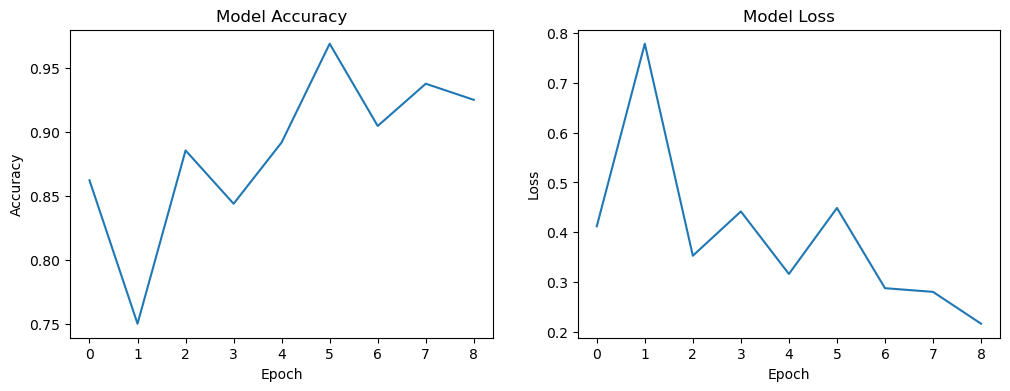

In [124]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
plot_training_history(history)

In [125]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.6466 - loss: 1.9155
Test accuracy: 0.6597
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step
